In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [15]:
kpi = pd.read_csv('../data/kpisetting.csv')
kpi['date'] = pd.to_datetime(kpi.date)
kpi = kpi.set_index('date', drop=True)
kpi.head()

,visitors,downloads,installations,28dactive
date,,,,
2015-01-14,16489,1826,570,270
2015-01-15,16362,936,266,104
2015-01-16,16463,188,61,67
2015-01-17,15972,474,112,40
2015-01-18,16659,186,109,32


In [16]:
from sklearn.model_selection import train_test_split

X = kpi[['visitors', 'downloads', '28dactive']]
y = kpi.installations
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
X_train.head()

,visitors,downloads,28dactive
date,,,
2018-05-02,27751,1081,149
2019-08-16,32905,1069,118
2016-04-12,19749,993,173
2020-03-20,35613,3813,296
2016-08-21,22086,795,52


In [21]:
model = LinearRegression()
model.fit(X_train[['visitors']], y_train)
y_pred = model.predict(X_test[['visitors']])

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

94710.40047541536 0.15754365027617256


<AxesSubplot: xlabel='visitors', ylabel='installations'>

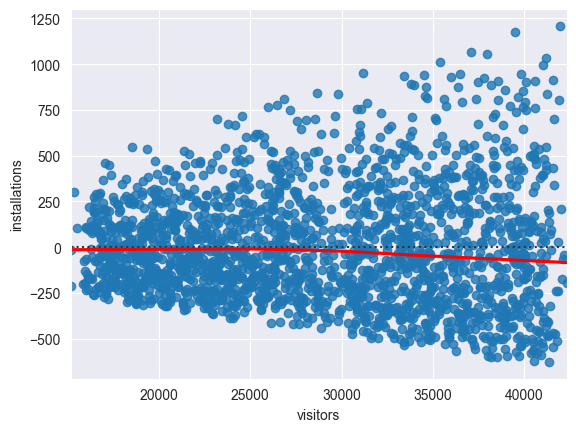

In [26]:
import seaborn as sns
sns.residplot(x=X_test[['visitors']], y=y_test, lowess=True, line_kws={'color': 'red'})